In [7]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

In [9]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

In [11]:
#https://drive.google.com/file/d/1sSFKgwqp3bJaEBJST-VKVbb_-saHZH2M/view?usp=sharing#
fileDownloaded = drive.CreateFile({'id':'1sSFKgwqp3bJaEBJST-VKVbb_-saHZH2M'})

In [12]:
fileDownloaded.GetContentFile('Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data = pd.read_csv('Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')
data

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1981,5,All ages,0.0,12.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3,NaN
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1,NaN
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4,NaN
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2,NaN


In [16]:
data.shape

(6390, 13)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        5484 non-null   float64
 12  FLAG            906 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 649.1+ KB


In [18]:
data.describe()

,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,5484.000000
mean,1.872926,4.621909,4.686775,1997.525822,22.692019,2.712207,13.709810
std,0.333081,2.031777,1.829624,14.937451,12.286033,1.932280,11.531805
min,1.000000,0.000000,0.000000,1950.000000,1.000000,0.000000,0.300000
25%,2.000000,3.000000,3.230000,1988.000000,12.000000,0.000000,5.000000
50%,2.000000,5.000000,5.125100,1999.000000,23.000000,3.000000,10.500000
75%,2.000000,6.000000,6.153000,2009.000000,33.000000,4.100000,19.500000
max,2.000000,11.000000,7.235000,2018.000000,42.000000,6.000000,74.800000


In [19]:
data.isnull().sum()

INDICATOR            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           906
FLAG              5484
dtype: int64

array([[<Axes: title={'center': 'UNIT_NUM'}>,
        <Axes: title={'center': 'STUB_NAME_NUM'}>,
        <Axes: title={'center': 'STUB_LABEL_NUM'}>],
       [<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'YEAR_NUM'}>,
        <Axes: title={'center': 'AGE_NUM'}>],
       [<Axes: title={'center': 'ESTIMATE'}>, <Axes: >, <Axes: >]],
      dtype=object)

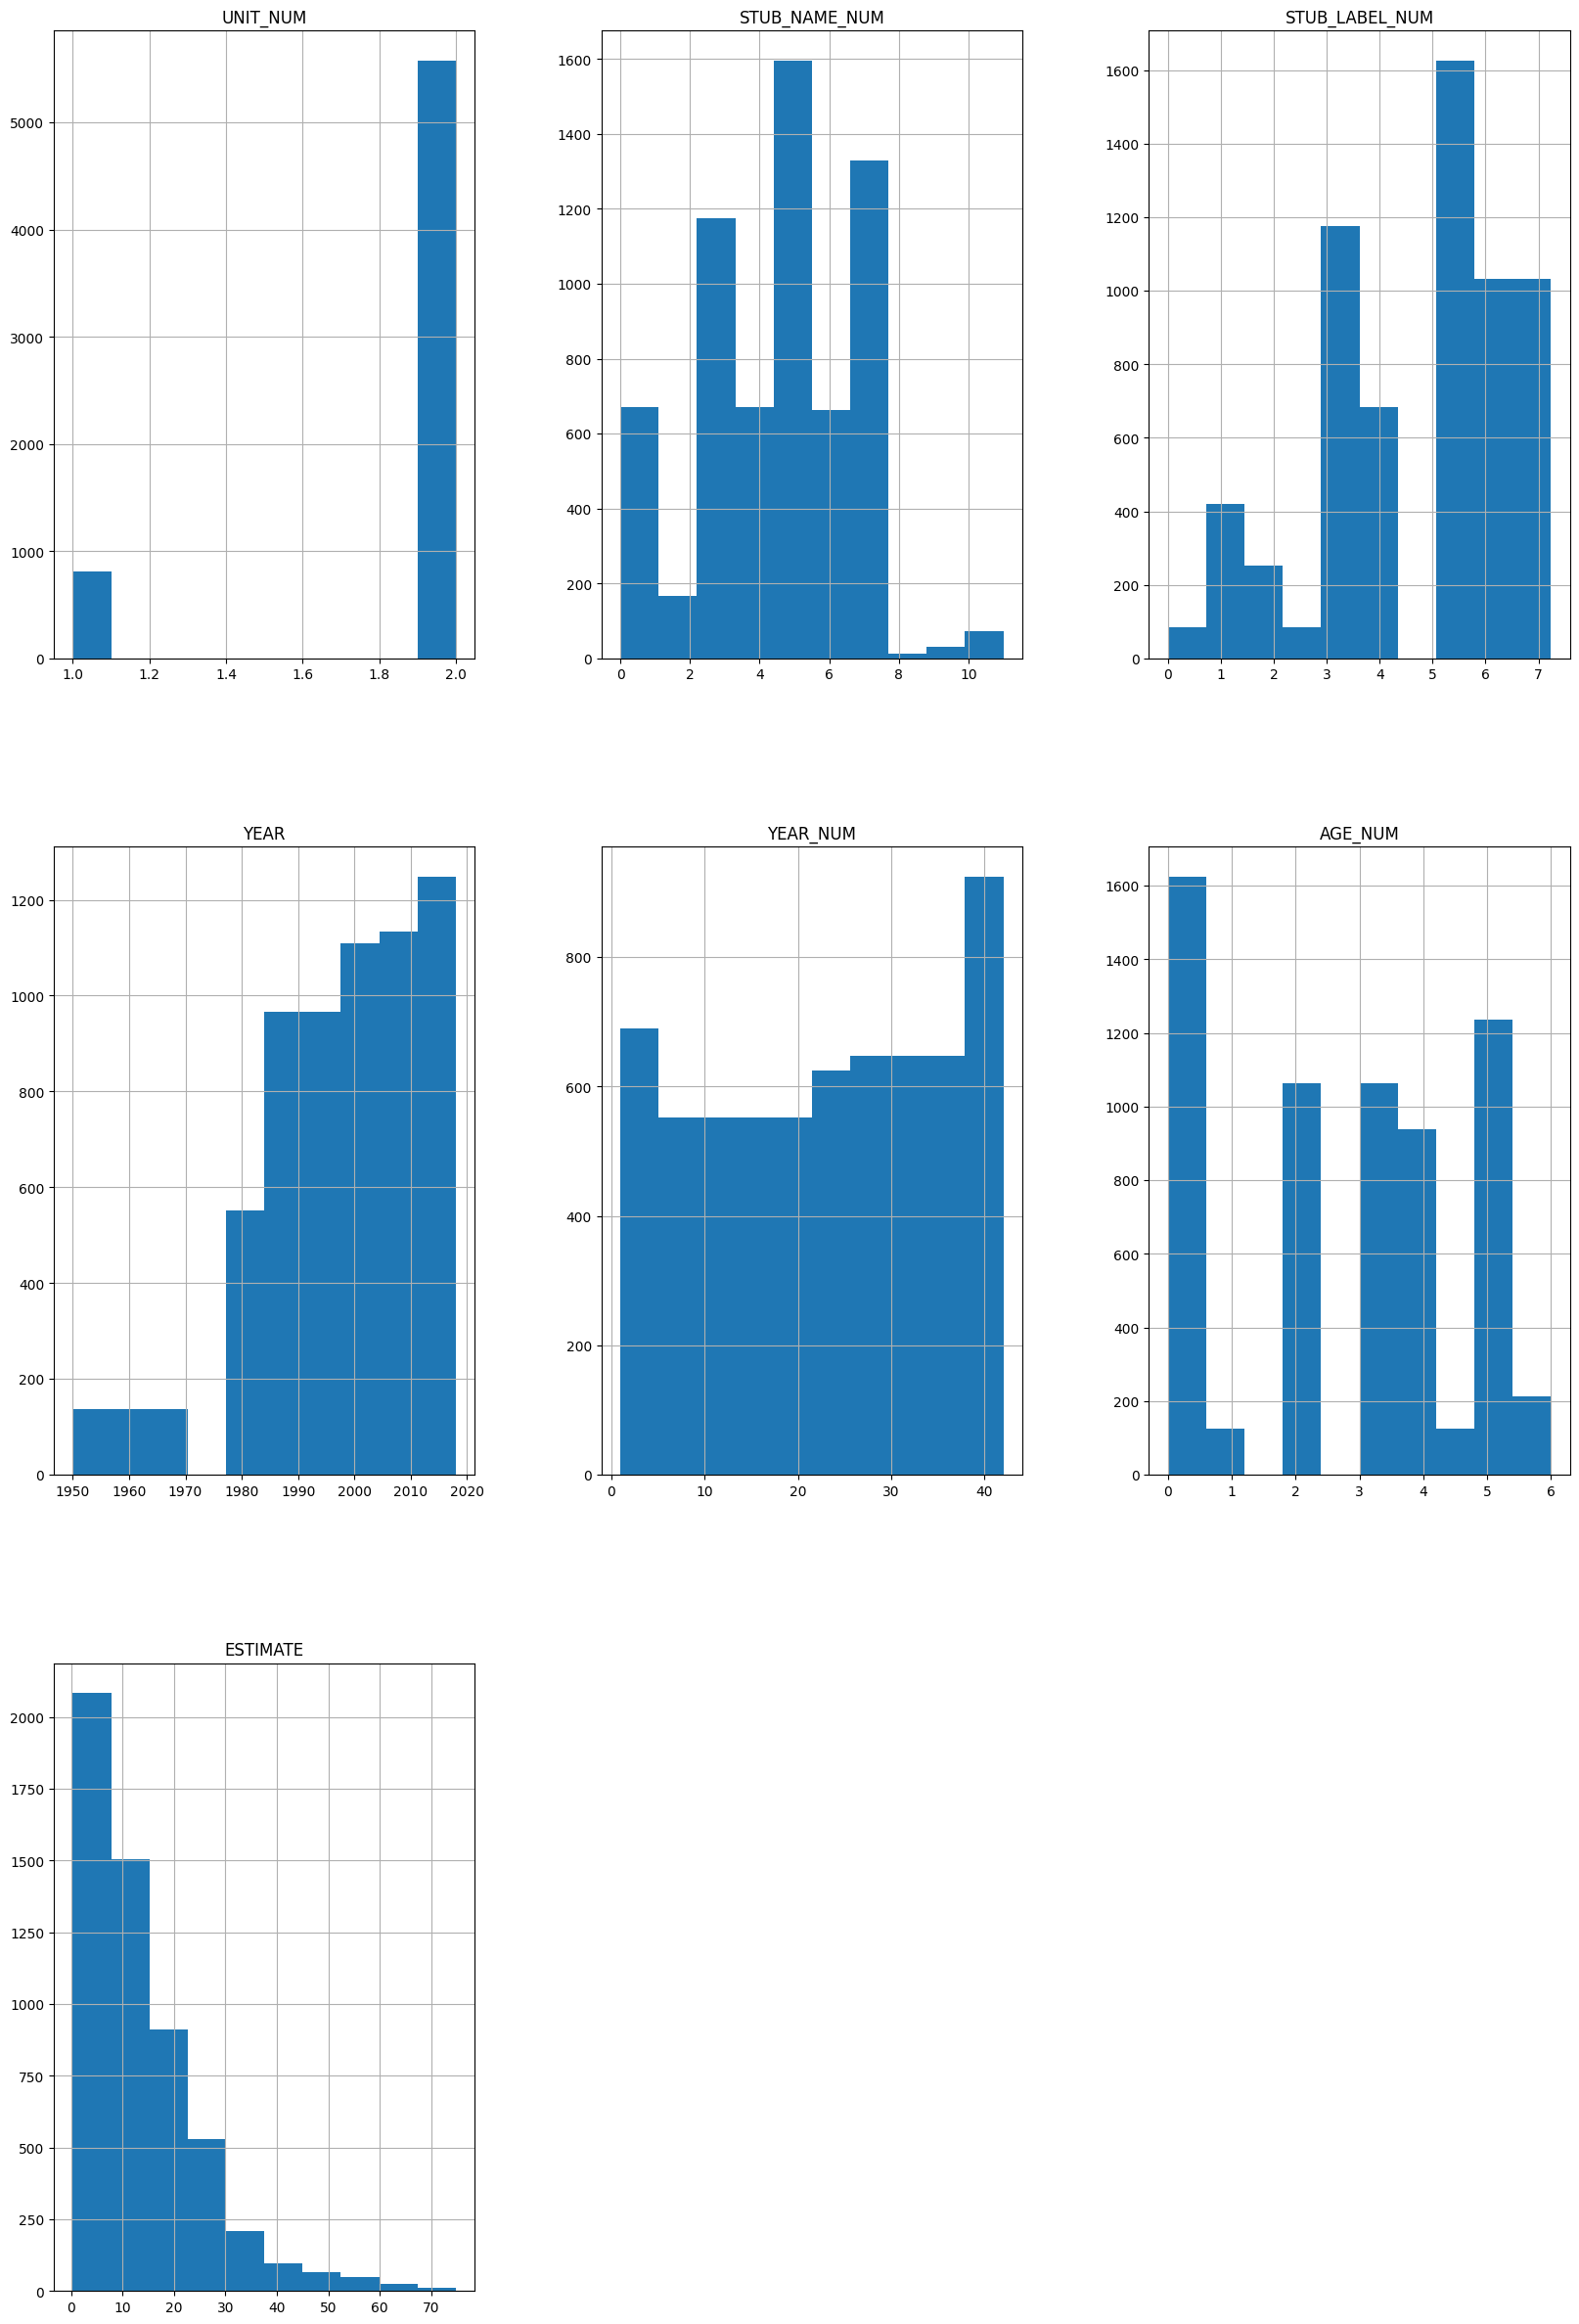

In [20]:
data.hist(figsize=(20,30))

In [45]:
data.sort_values(by=['STUB_LABEL', 'YEAR'], ascending=False)

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
3331,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Male: White: 85 years and over,5.1153,2018,42,85 years and over,6.0,51.8,NaN
6306,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race (Single race)",9,Male: White: 85 years and over,5.1153,2018,42,85 years and over,6.0,52.1,NaN
3330,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Male: White: 85 years and over,5.1153,2017,41,85 years and over,6.0,55.3,NaN
3329,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Male: White: 85 years and over,5.1153,2016,40,85 years and over,6.0,52.5,NaN
3328,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race",5,Male: White: 85 years and over,5.1153,2015,39,85 years and over,6.0,52.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,10-14 years,1.1000,1981,5,10-14 years,1.0,0.9,NaN
857,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,10-14 years,1.1000,1980,4,10-14 years,1.0,0.8,NaN
856,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,10-14 years,1.1000,1970,3,10-14 years,1.0,0.6,NaN
855,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,Age,1,10-14 years,1.1000,1960,2,10-14 years,1.0,0.5,NaN
